In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Classical spin evolution function
class Spin_classic:
    def __init__(self, const=np.array([0, 0, 0])):
        self.H = const
        
    def __call__(self, x, y):
        return np.cross(y, self.H)

In [4]:
#Initialization
funct = Spin_classic()

In [5]:
#funct.H = np.array([0, 0, 5])
#funct(np.array([0, 1, 0]), np.array([1, 2, 1]))

In [6]:
# One runge-kutta iteration function
def iteration(h, f, x, y):
    k1 = f(x, y)
    k2 = f(x + h / 2, y + h / 2 * k1)
    k3 = f(x + h / 2, y + h / 2 * k2)
    k4 = f(x + h, y + h * k3)
    r = y + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return x + h, r


In [7]:
#a, b = iteration(0.001, funct, np.array([0, 1, 0]), np.array([1, 1, 1]))
#print(a, b)

In [8]:
# Runge-Kutta process
def runge(t, h, x0, y0, f):
    a = []
    a.append((x0, y0))
    x, y = x0, y0
    for i in range(int(t / h)):
        x, y = iteration(h, f, x, y)
        a.append([x, y])
    return a

In [9]:
x0 = 0
funct.H = np.array([0, 0, 1])
y0 = np.array([np.sqrt(1 / 2), 0, np.sqrt(1 / 2)])


In [10]:
#funct(0, y0)

In [11]:
#Calculating itself
a = runge(10, 0.01, x0, y0, funct)

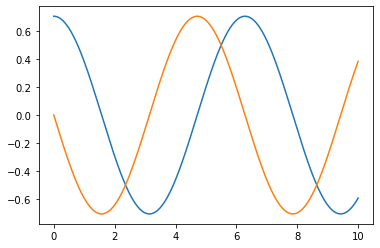

In [12]:
#Plot building
x = [a[i][0] for i in range(len(a))]
y = [a[i][1][0] for i in range(len(a))]
z = [a[i][1][1] for i in range(len(a))]
plt.plot(x, y)
plt.plot(x, z)
plt.show()

In [13]:
#Here and further is quantum broblem solution
class Spin_quantum():
    def __init__(self, const=np.array([0, 0, 0])):
        self.H = const
        
    def __call__(self, x, y):
        Ham = -1j * (self.H[0] * np.array([[0, 1], [1, 0]]) + self.H[1] * np.array([[0, -1j], [1j, 0]]) + self.H[2] * np.array([[1, 0], [0, -1]]))
        return np.dot(Ham, y)


In [14]:
hamilt = Spin_quantum()

In [15]:
x0 = 0
hamilt.H = np.array([0, 0, 1])
y0 = np.sqrt(np.array([0.5, 0.5]))

In [16]:
a = runge(10, 0.01, x0, y0, hamilt)

In [ ]:
#print(hamilt(0, np.array([0, 1])))